##Assignment 1
Name: Jonathan Au <br>
Student #: 300827701 <br>

##Question 1
This assignment will be similar to Assignment 2 but we will use hierarchical clustering in place of K-Means.
1.	Retrieve and load the Olivetti faces dataset [0 points]

2.	Split the training set, a validation set, and a test set using stratified sampling to ensure that there are the same number of images per person in each set. [0 points]

3.	Using k-fold cross validation, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. [0 points]

4.	Using either Agglomerative Hierarchical Clustering (AHC) or Divisive Hierarchical Clustering (DHC) and using the centroid-based clustering rule, reduce the dimensionality of the set by using the following similarity measures:

- a) Euclidean Distance [20 points]

- b) Minkowski Distance [20 points]

- c) Cosine Similarity [20 points]

5.	Discuss any discrepancies observed between 4(a), 4(b), or 4(c).
Use the silhouette score approach to choose the number of clusters for 4(a), 4(b), and 4(c). [10 points]

6. Use the set from (4(a), 4(b), or 4(c)) to train a classifier as in (3) using k-fold cross validation. [30 points]


In [12]:
#Imports
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold

import warnings
warnings.filterwarnings("ignore")

1.	Retrieve and load the Olivetti faces dataset [0 points]



In [2]:
# Load olivetti faces
olivetti = fetch_olivetti_faces()
X = olivetti.data
Y = olivetti.target
Z = olivetti.images

# Print the description and shapes of the dataset
#print(olivetti.DESCR)
print(X.shape)
print(Y.shape)
print(Z.shape)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
(400, 4096)
(400,)
(400, 64, 64)


2.	Split the training set, a validation set, and a test set using stratified sampling to ensure that there are the same number of images per person in each set. [0 points]



In [3]:
#split into train and test data
X_train, X_val_test, y_train, y_val_test = train_test_split(X, Y, test_size=.665)
#X_train, X_val_test, y_train, y_val_test = train_test_split(X, Y, test_size=.4)
#A test size of .665 was given such that the train data would be slightly larger as it was impossible for all three of them to be completly equal

#split train data into train and validation data
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)

#print the shapes of the data
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)


(134, 4096)
(133, 4096)
(133, 4096)


3.	Using k-fold cross validation, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. [0 points]

In [4]:
#Use K-fold for cross val
kFoldCV = KFold(n_splits=5)
kFoldCV.get_n_splits(X)
print(kFoldCV)

#Training classifier for prediction
#y_pred = cross_val_predict(kmean, X_train, y_train, cv=kFoldCV)
y_pred = cross_val_predict(LogisticRegression(), X_train, y_train, cv=kFoldCV)
#y_pred = cross_val_predict(RandomForestRegressor(), X_train, y_train, cv=kFoldCV)
print("Y Prediction: ", y_pred)

score = cross_val_score(LogisticRegression(), X_train, y_train, cv=kFoldCV)
#score = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=kFoldCV)
print("Score: ", score)

KFold(n_splits=5, random_state=None, shuffle=False)
Y Prediction:  [28 38  4  7  8 25 32 31 24 20 14  6 22  4  7  4  0 31 29 31  9 24  4 30
  0  4 12 12 21 31 22  2 31 24  0  8  4  2 25 19 39 13 34 25 31  2 38 31
 39 23  7 38  7 30  2 39 29  8 22 20 39  1 32 17 25  8  7 17 28 21 20 25
 39 23  6 23 31 38 27 29 23 14  8 23 32  4 14 13  5 25 20  2 38 30 38 36
 24 38 10  8 23 23 19 39 31 28 17 23 30 39 29  4  7 23 13  0 31  0 23 19
 17  2 30 29  0 12 29 17 19  0 36 36 29 32]
Score:  [0.74074074 0.7037037  0.74074074 0.59259259 0.5       ]


4.	Using either Agglomerative Hierarchical Clustering (AHC) or Divisive Hierarchical Clustering (DHC) and using the centroid-based clustering rule, reduce the dimensionality of the set by using the following similarity measures:

- a) Euclidean Distance [20 points]

- b) Minkowski Distance [20 points]

- c) Cosine Similarity [20 points]

5.	Discuss any discrepancies observed between 4(a), 4(b), or 4(c).
Use the silhouette score approach to choose the number of clusters for 4(a), 4(b), and 4(c). [10 points]



Data Labels:  [0 2 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 2 2 2 2 0 0 2 0 1 1 1 1 1 1 1 1 1 1 0 0
 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 2 2 2 2 2 2 2 2 0 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 2 2 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 2 2 2 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 0 2 2 0 2 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 2 0 2 0 0]
euclidean  Silhouette Score:  0.082989365
For n_clusters = 2 The average silhouette_score is : 0.15243226
For n_clusters = 3 The average silhouette_score is : 0.12536141
For 

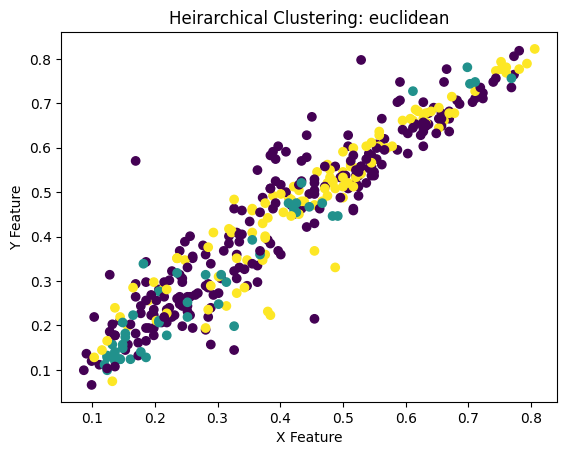

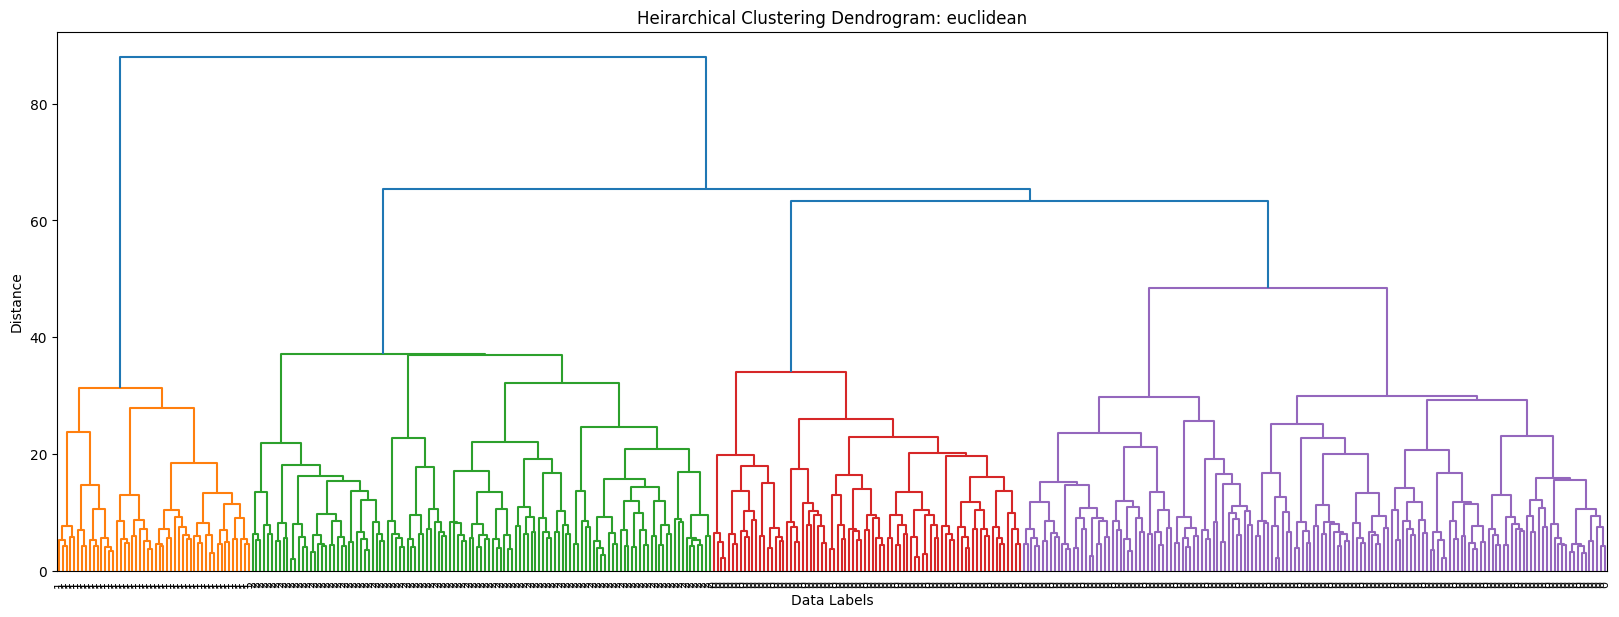

Data Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 2 2 0 0 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2
 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0]
minkowski  Silhouette Score:  0.13071483
For n_clusters = 2 The average silhouette_score is : 0.15243226
For n_clusters = 3 The average silhouette_score is : 0.12536141
For n

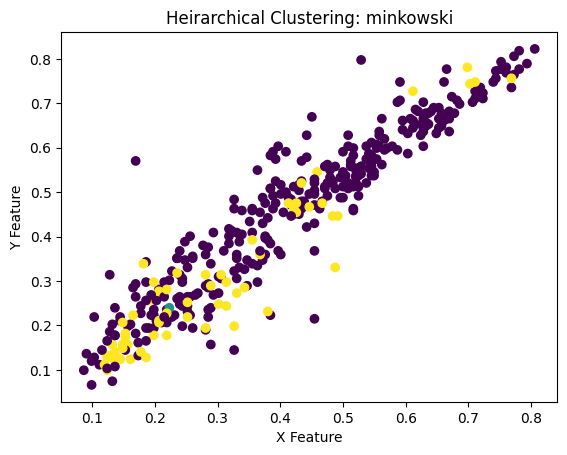

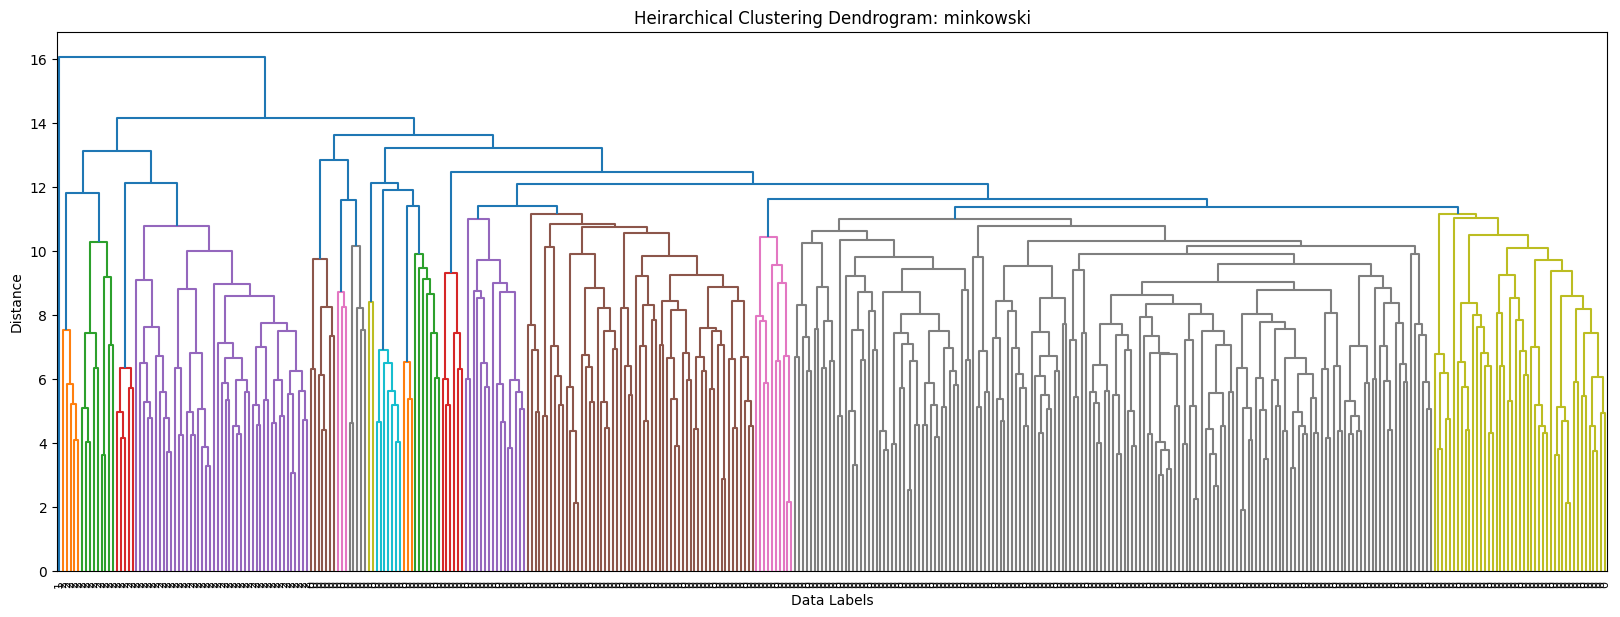

Data Labels:  [0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1
 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2
 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0]
cosine  Silhouette Score:  0.06333944
For n_clusters = 2 The average silhouette_score is : 0.15243226
For n_clusters = 3 The average silhouette_score is : 0.123379536
For n_c

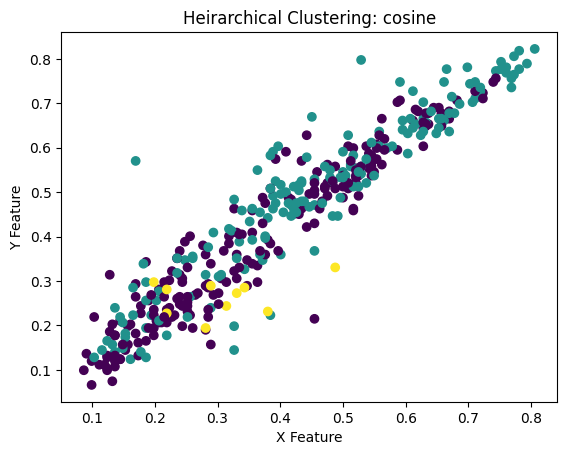

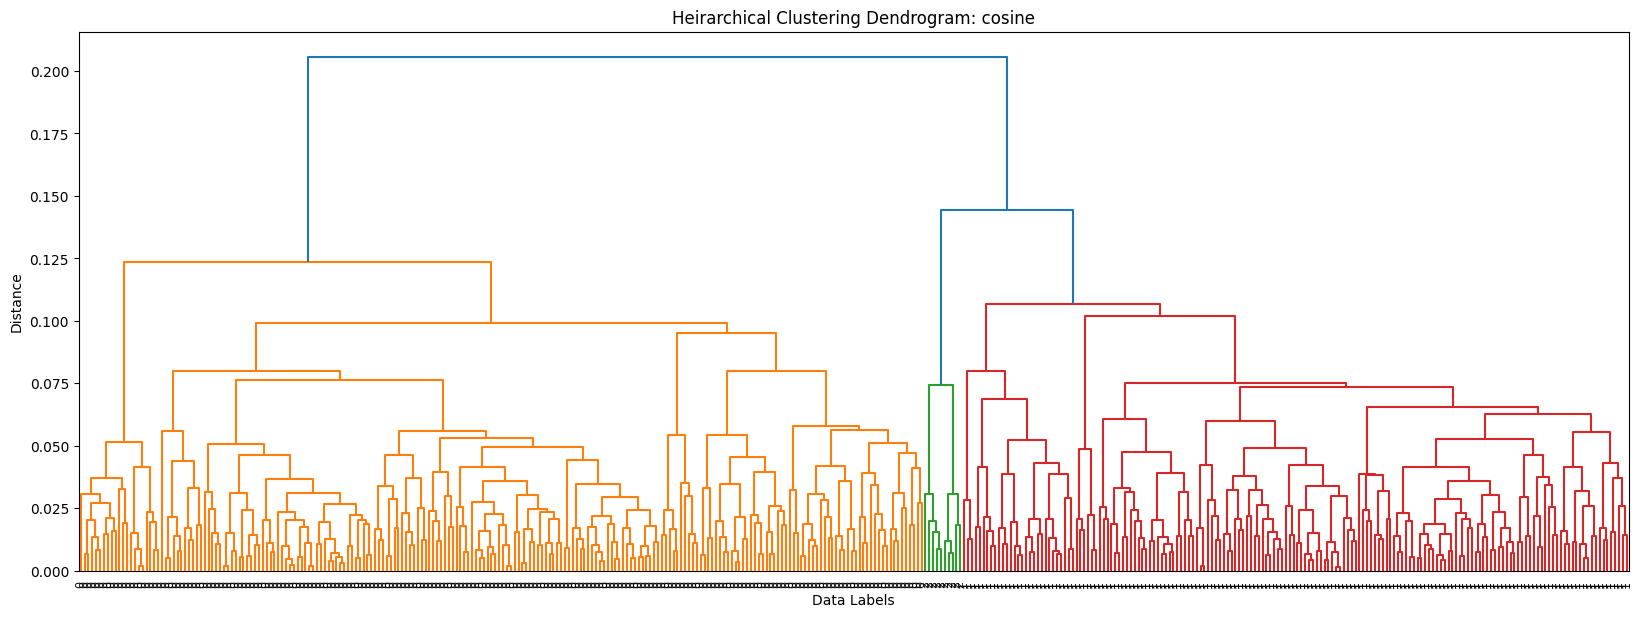

In [23]:
range_n_clusters = [2, 3, 4, 5, 6]
dist_measure = ['euclidean', 'minkowski', 'cosine']
for i in dist_measure:
  if i == 'minkowski':
    link='average'
  elif i == 'cosine':
    link='complete'
  else:
    link='ward'

  ahc_clf = AgglomerativeClustering(n_clusters=3, metric=i, linkage=link)
  ahc_clf.fit(X)
  data_lbl = ahc_clf.labels_
  print("Data Labels: ", data_lbl)

  #Print Silhouette Score
  print(i, " Silhouette Score: ", silhouette_score(X, data_lbl))
  for n_clusters in range_n_clusters:
    #Use Silhouette score to choose cluster numbers
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

  #Plot data
  plt.scatter(X[:, 0], X[:, 1], c=data_lbl, cmap='viridis')
  plt.xlabel('X Feature')
  plt.ylabel('Y Feature')
  plt.title(f'Heirarchical Clustering: {i}')
  plt.show()

  #Plot Dendrogram
  plt.figure(figsize=(20,7))
  plt.xlabel('Data Labels')
  plt.ylabel('Distance')
  plt.title(f'Heirarchical Clustering Dendrogram: {i}')
  dendrogrm = sch.dendrogram(sch.linkage(X, link, metric=i),
                             labels=data_lbl,
                             leaf_rotation=90,
                             leaf_font_size=8,
                             show_contracted=True)
  plt.show()

6. Use the set from (4(a), 4(b), or 4(c)) to train a classifier as in (3) using k-fold cross validation. [30 points]

In [38]:
#Selected Silhouette score Cluster
ahc_clf = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
ahc_clf.fit(X)
data_lbl = ahc_clf.labels_
#print("Data Labels: ", data_lbl)

#Print Silhouette Score
print(" Silhouette Score: ", silhouette_score(X, data_lbl))

#KFold Cross val
kFoldCV = KFold(n_splits=4)
kFoldCV.get_n_splits(X)
print(kFoldCV)
y_pred = cross_val_predict(RandomForestRegressor(), X_train, y_train, cv=kFoldCV)
print("Y Prediction: ", y_pred)

score = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=kFoldCV)
print("Score: ", score)

 Silhouette Score:  0.09009906
KFold(n_splits=4, random_state=None, shuffle=False)
Y Prediction:  [22.72 33.71 19.06 12.54 15.52 17.31 28.49 22.95 17.89 29.3  24.42  9.05
 15.21 25.23 12.57 15.78 11.55 17.76 22.65 20.64 17.97 20.38 17.46 25.8
 17.76 18.62 15.42 16.66 28.97 18.79 21.65 13.78 18.75 15.29  7.87 15.09
 11.67 20.39 24.7  15.75 24.54 20.03 19.69 24.78 22.84 18.94 30.89 22.48
  9.58 22.07  8.21 31.63  8.31 27.29 14.03 19.73 26.74 10.35  9.58 23.82
 15.02 22.03 26.76 15.47 18.91 21.11  8.18 13.9  17.49 31.39 21.99 20.49
 17.65 25.06 12.44 20.41 18.86 34.23 17.04 29.76 18.38 11.68 14.64  6.71
 29.18 31.29 18.12 16.43 27.16 18.83 19.2   8.57 31.28 29.47 34.55 20.84
 19.12 33.17 11.83 15.94 11.01 19.64 21.84 20.17 28.1  26.28 13.99 11.1
  9.31 23.35 30.7  13.66 20.77 28.26 17.49  9.59 20.98 16.83 28.59 21.16
 16.81 14.68 28.06 24.69  9.48 18.79 26.98 17.51 22.4  18.53 23.84 21.91
 28.48 31.03]
Score:  [0.2252876  0.26220939 0.22755803 0.29358508]


7. A 5-minute video presentation is required as part of the submission to document the steps taken to obtain the results. Any submission without a demo video will result in a 75% penalty.